In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob, os

In [65]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,10)

In [66]:
sns.set(
    rc={'figure.figsize':(11.7,8.27)}
)

# COVID-19 Data Analysis

This is an analysis of Covid-19 data. The data is taken from Johns Hopkins CSSE department, and available for educational purposes. Here is a reference to the dataset: https://github.com/CSSEGISandData/COVID-19

## Data Processing

The reports are made on a daily basis. We'll start by looking at the latest report.

In [67]:
daily_reports = glob.glob("../csse_covid_19_data/csse_covid_19_daily_reports/*.csv")
daily_reports.sort()
last_report = daily_reports[-1]
report = pd.read_csv(last_report)
last_report.split("/")[-1].split(".csv")[0]

'03-25-2020'

First, let's have a look at what the table looks like and what kind of data to expect

In [68]:
report[report["Country_Region"]=="Brazil"]

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
3272,NaN,NaN,NaN,Brazil,2020-03-25 23:33:04,-14.235,-51.9253,2554,59,2,2493,Brazil


In [7]:
report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3420 entries, 0 to 3419
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FIPS            3150 non-null   float64
 1   Admin2          3169 non-null   object 
 2   Province_State  3251 non-null   object 
 3   Country_Region  3420 non-null   object 
 4   Last_Update     3420 non-null   object 
 5   Lat             3420 non-null   float64
 6   Long_           3420 non-null   float64
 7   Confirmed       3420 non-null   int64  
 8   Deaths          3420 non-null   int64  
 9   Recovered       3420 non-null   int64  
 10  Active          3420 non-null   int64  
 11  Combined_Key    3420 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 320.8+ KB


### Preprocessing

Before going into more analysis, we'll not focus on Latitude and Longitude for now. We'll also rename the column name for `Country/Region` and `Province/State`

In [8]:
report = report.drop(["Lat", "Long_", "FIPS", "Combined_Key"], axis=1)
report = report.rename(columns={"Province_State": "Sub_Area", "Country_Region": "Area"})

### Descriptive

In [9]:
report.describe()

,Confirmed,Deaths,Recovered,Active
count,3420.000000,3420.000000,3420.000000,3420.000000
mean,136.723392,6.193275,33.266082,77.523392
std,2171.928392,158.688769,1075.717645,1439.028818
min,0.000000,0.000000,0.000000,-6.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000
75%,4.000000,0.000000,0.000000,0.000000
max,74386.000000,7503.000000,60811.000000,57521.000000


Looking at the percentiles, the distribution seems to be strongly skewed. Let's have a look at the median.

In [10]:
report.median()

Confirmed    1.0
Deaths       0.0
Recovered    0.0
Active       0.0
dtype: float64

Let's get a feel for which country is the Median.

In [11]:
sorted_report_by_confirmed = report.sort_values(by="Confirmed", ascending=False)
sorted_report_by_confirmed.iloc[len(report)//2]

Admin2                     Fayette
Sub_Area                      Iowa
Area                            US
Last_Update    2020-03-25 23:33:19
Confirmed                        1
Deaths                           0
Recovered                        0
Active                           0
Name: 918, dtype: object

But before diving more into detail. Let's look at the total global numbers:

In [12]:
report.iloc[:,3:].sum()

Last_Update    2020-03-25 23:33:192020-03-25 23:33:192020-03-...
Confirmed                                                 467594
Deaths                                                     21181
Recovered                                                 113770
Active                                                    265130
dtype: object

In [13]:
sorted_report_by_confirmed.head(10)

,Admin2,Sub_Area,Area,Last_Update,Confirmed,Deaths,Recovered,Active
3329,NaN,NaN,Italy,2020-03-25 23:33:04,74386,7503,9362,57521
3202,NaN,Hubei,China,2020-03-25 10:50:39,67801,3163,60811,3827
3395,NaN,NaN,Spain,2020-03-25 23:33:04,49515,3647,5367,40501
3310,NaN,NaN,Germany,2020-03-25 23:33:04,37323,206,3547,33570
3325,NaN,NaN,Iran,2020-03-25 23:33:04,27017,2077,9625,15315
3306,NaN,NaN,France,2020-03-25 23:33:04,25233,1331,3900,20002
2067,New York City,New York,US,2020-03-25 23:33:19,17856,199,0,0
3400,NaN,NaN,Switzerland,2020-03-25 23:33:04,10897,153,131,10613
3413,NaN,NaN,United Kingdom,2020-03-25 23:33:04,9529,465,135,8929
3335,NaN,NaN,"Korea, South",2020-03-25 23:33:04,9137,126,3730,5281


We can see that New York State in the US seems to be a Corona hotspot. But are those all the cases from the US?

In [14]:
us_cases = sum(report[report["Area"] == "US"]["Confirmed"])
print(us_cases)

65778


Let's look at the sum of the cases grouped by country.

In [15]:
sum_over_region = report.groupby("Area").sum()
sum_over_region = sum_over_region.sort_values(by="Confirmed", ascending=False)
sum_over_region = sum_over_region.reset_index()
sum_over_region.head(10)

,Area,Confirmed,Deaths,Recovered,Active
0,China,81661,3285,73773,4603
1,Italy,74386,7503,9362,57521
2,US,65778,942,361,0
3,Spain,49515,3647,5367,40501
4,Germany,37323,206,3547,33570
5,Iran,27017,2077,9625,15315
6,France,25600,1333,3907,20360
7,Switzerland,10897,153,131,10613
8,United Kingdom,9640,466,140,9034
9,"Korea, South",9137,126,3730,5281


Let's fix the value for active cases in the US

In [16]:
sum_over_region["Active"] = sum_over_region["Confirmed"] - sum_over_region["Deaths"] - sum_over_region["Recovered"]

In [17]:
sum_over_region.head(10)

,Area,Confirmed,Deaths,Recovered,Active
0,China,81661,3285,73773,4603
1,Italy,74386,7503,9362,57521
2,US,65778,942,361,64475
3,Spain,49515,3647,5367,40501
4,Germany,37323,206,3547,33570
5,Iran,27017,2077,9625,15315
6,France,25600,1333,3907,20360
7,Switzerland,10897,153,131,10613
8,United Kingdom,9640,466,140,9034
9,"Korea, South",9137,126,3730,5281


This perspective also changes the median:

In [18]:
sum_over_region.iloc[len(sum_over_region)//2]

Area         Brunei
Confirmed       109
Deaths            0
Recovered         2
Active          107
Name: 86, dtype: object

In [19]:
sum_over_region.sort_values(by="Deaths", ascending=False).head(10)

,Area,Confirmed,Deaths,Recovered,Active
1,Italy,74386,7503,9362,57521
3,Spain,49515,3647,5367,40501
0,China,81661,3285,73773,4603
5,Iran,27017,2077,9625,15315
6,France,25600,1333,3907,20360
2,US,65778,942,361,64475
8,United Kingdom,9640,466,140,9034
10,Netherlands,6438,357,4,6077
4,Germany,37323,206,3547,33570
12,Belgium,4937,178,547,4212


## Data Visualisations

Total number of confirmed cases.

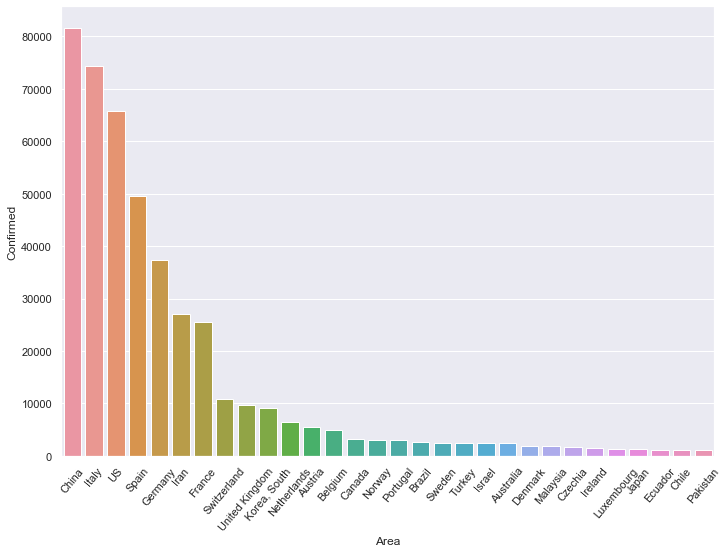

In [21]:
ax = sns.barplot(x="Area", y="Confirmed", data=sum_over_region.head(30))
ticks = ax.set_xticklabels(ax.get_xticklabels(),rotation=50)

Confirmed cases over Deadly Cases

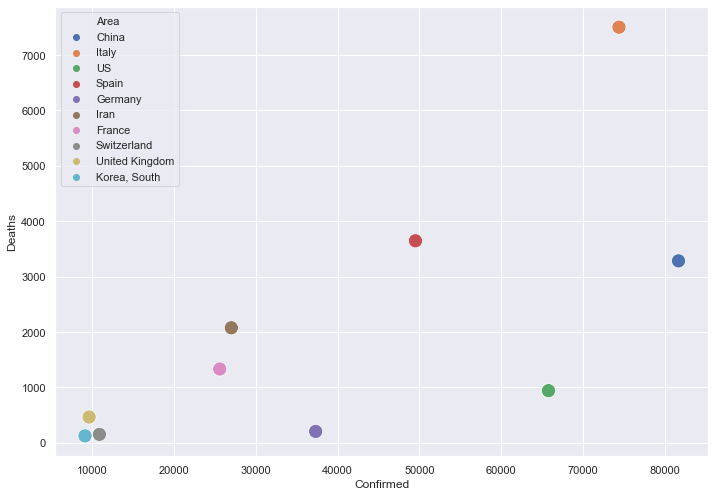

In [22]:
sns.scatterplot(x="Confirmed", y="Deaths",
            hue="Area", s=200,
            data=sum_over_region.head(10));

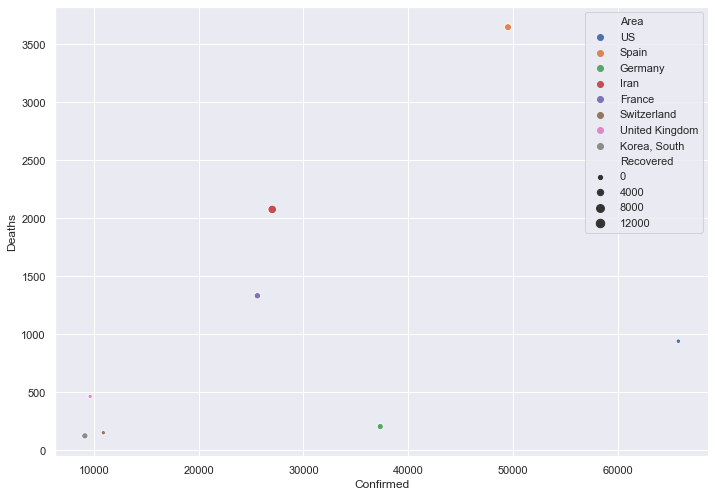

In [23]:
sns.scatterplot(x="Confirmed", y="Deaths",
            hue="Area", size="Recovered",
            data=sum_over_region[2:].head(8));

### Combined Numbers for top countries with most confirmed cases

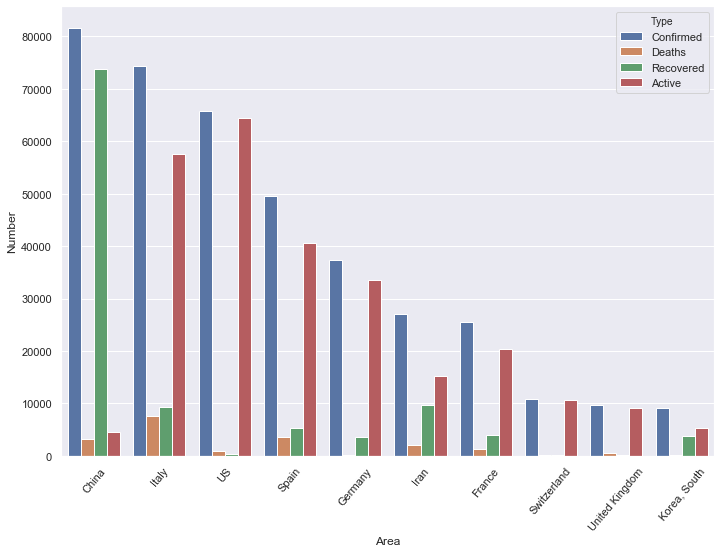

In [24]:
melted_summary = pd.melt(sum_over_region.head(10), id_vars="Area", var_name="Type", value_name="Number")
ax = sns.barplot(x='Area', y='Number', hue='Type', data=melted_summary)
ticks = ax.set_xticklabels(ax.get_xticklabels(),rotation=50)

In [25]:
n = 8

### Distribution of confirmed cases and deadly cases across countries

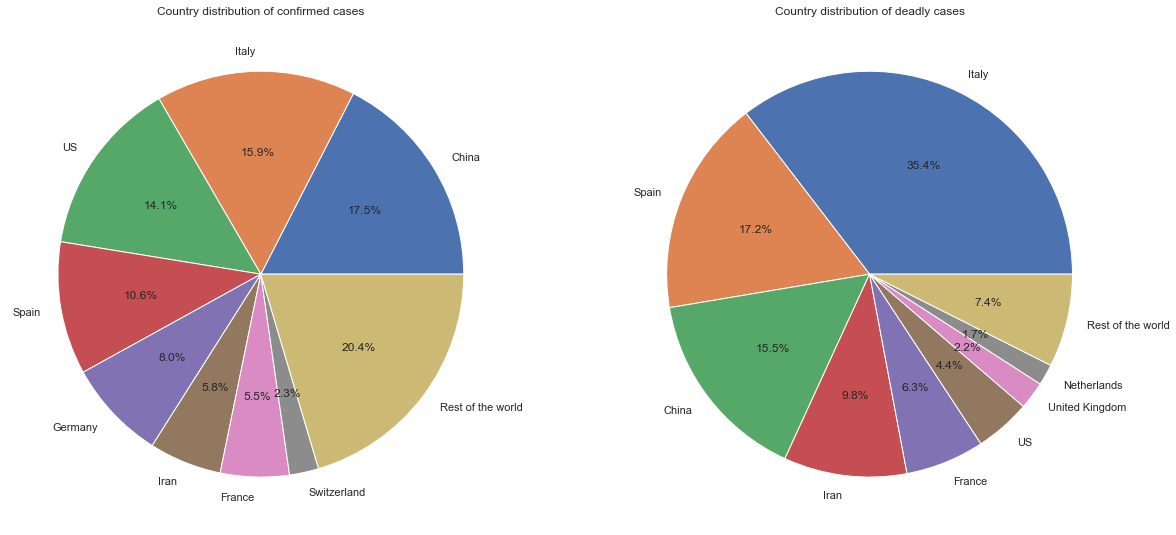

In [27]:
plt.figure(1, figsize=(20,10))
the_grid = plt.GridSpec(1, 2)

sum_over_region_sort_deaths = sum_over_region.sort_values(by="Deaths",ascending=False)

death_top_n = sum_over_region_sort_deaths["Deaths"].head(n)
confirmed_top_n = sum_over_region["Confirmed"].head(n)
countries_top_n_confirmed = sum_over_region["Area"].head(n)
countries_top_n_death = sum_over_region_sort_deaths["Area"].head(n)
total_death_after_top_n = sum(sum_over_region_sort_deaths["Deaths"].iloc[n:])
total_confirmed_after_top_n = sum(sum_over_region["Confirmed"].iloc[n:])

death_top_n = death_top_n.append(pd.Series([total_death_after_top_n]))
confirmed_top_n = confirmed_top_n.append(pd.Series([total_confirmed_after_top_n]))
countries_top_n_confirmed = countries_top_n_confirmed.append(pd.Series(["Rest of the world"]))
countries_top_n_death = countries_top_n_death.append(pd.Series(["Rest of the world"]))

plt.subplot(the_grid[0, 0], aspect=1, title='Country distribution of confirmed cases')
confirmed_pie = plt.pie(confirmed_top_n, labels=countries_top_n_confirmed, autopct='%1.1f%%')
plt.subplot(the_grid[0, 1], aspect=1, title='Country distribution of deadly cases')
death_pie = plt.pie(death_top_n, labels=countries_top_n_death, autopct='%1.1f%%')

Let's have a quick look at the rate of deadly cases per country to identify the most vulnerable countries.

### Death Rate

In [28]:
sum_over_region["Deadly Case Rate"] = sum_over_region["Deaths"]/sum_over_region["Confirmed"]

Let's order by the death rate and look at the countries with the highest rate of deadly cases.

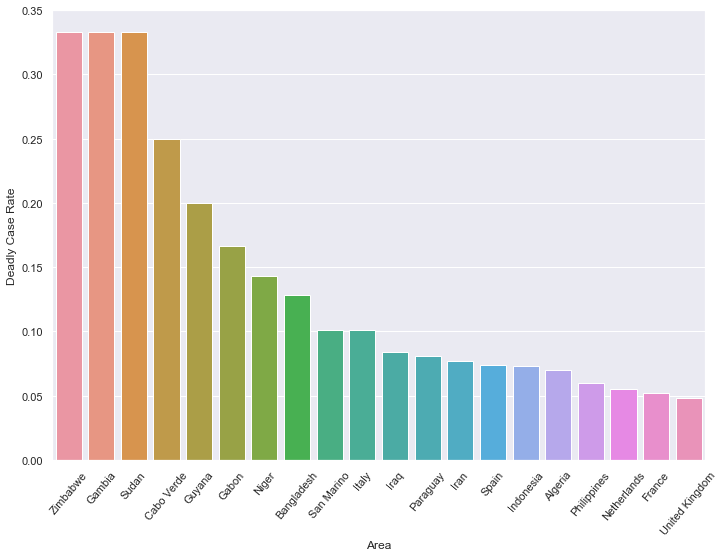

In [29]:
sum_sorted_by_death_rate = sum_over_region.sort_values(by='Deadly Case Rate', ascending=False).head(20).reset_index()
ax = sns.barplot(x='Area', y='Deadly Case Rate', data=sum_sorted_by_death_rate)
ticks = ax.set_xticklabels(ax.get_xticklabels(),rotation=50)

That's a frightening picture, but is it representative?

Let's look at the companies with a given minimum number of deaths to make this statistically more significant.

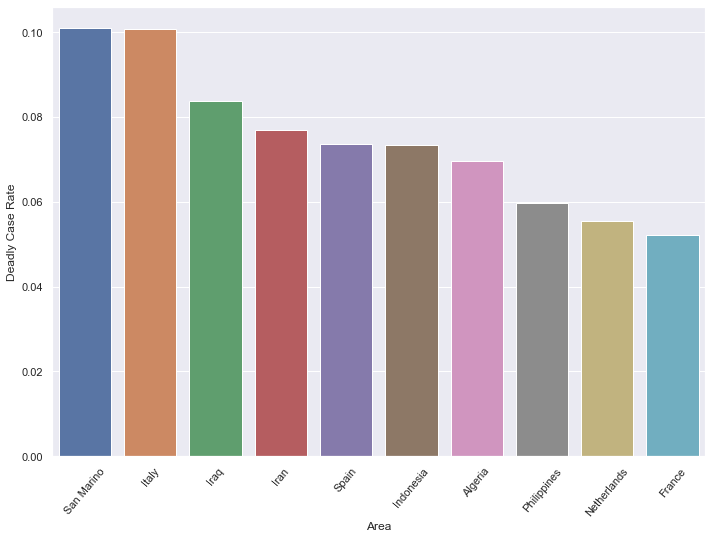

In [30]:
minimum_deaths = 10
sum_sorted_by_death_rate_minimum_deaths = sum_over_region[sum_over_region["Deaths"]>minimum_deaths].sort_values(by='Deadly Case Rate', ascending=False).head(10).reset_index()
ax = sns.barplot(x='Area', y='Deadly Case Rate', data=sum_sorted_by_death_rate_minimum_deaths)
ticks = ax.set_xticklabels(ax.get_xticklabels(),rotation=50)

Let's look at death rate ordered by confirmed cases

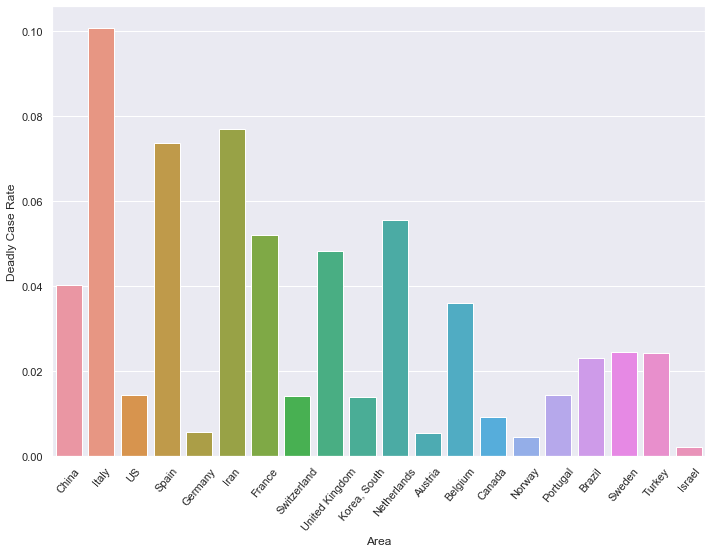

In [31]:
ax = sns.barplot(x='Area', y='Deadly Case Rate', data=sum_over_region.head(20).reset_index())
ticks = ax.set_xticklabels(ax.get_xticklabels(),rotation=50)

### Normalized by population

Now we know the distribution of cases and the absolute mortality for each country. But these numbers need a bit of context. The gravity for a country needs to be measured in relative terms with respect to the country's population. We'll add some population information for each country

In [32]:
from datapackage import Package

package = Package('https://datahub.io/JohnSnowLabs/population-figures-by-country/datapackage.json')

Here is the yearly population for some countries from Year-0 (now) to some years in the past, e.g. Year-56

In [33]:
# print processed tabular data (if exists any)
country_population = pd.DataFrame(package.resources[1].read())
country_population.columns = ["Area", "Country Code"] + ["Year-{}".format(n) for n in range(len(country_population.columns)-2)][::-1]
country_population[[country in ["Spain", "Germany", "Norway", "Brazil", "Sweden", "Russia", "United States"] for country in country_population.iloc[:,0]]]

,Area,Country Code,Year-56,Year-55,Year-54,Year-53,Year-52,Year-51,Year-50,Year-49,...,Year-9,Year-8,Year-7,Year-6,Year-5,Year-4,Year-3,Year-2,Year-1,Year-0
27,Brazil,BRA,72207554.0,74351763.0,76573248.0,78854019.0,81168654.0,83498020.0,85837799.0,88191378.0,...,191026637,192979029,194895996,196796269,198686688,200560983,202408632,204213133,205962108,207652865.0
53,Germany,DEU,72814900.0,73377632.0,74025784.0,74714353.0,75318337.0,75963695.0,76600311.0,76951336.0,...,82266372,82110097,81902307,81776930,80274983,80425823,80645605,80982500,81686611,82667685.0
68,Spain,ESP,30455000.0,30739250.0,31023366.0,31296651.0,31609195.0,31954292.0,32283194.0,32682947.0,...,45226803,45954106,46362946,46576897,46742697,46773055,46620045,46480882,46447697,46443959.0
174,Norway,NOR,3581239.0,3609800.0,3638918.0,3666537.0,3694339.0,3723168.0,3753012.0,3784539.0,...,4709153,4768212,4828726,4889252,4953088,5018573,5079623,5137232,5188607,5232929.0
220,Sweden,SWE,7484656.0,7519998.0,7561588.0,7604328.0,7661354.0,7733853.0,7807797.0,7867931.0,...,9148092,9219637,9298515,9378126,9449213,9519374,9600379,9696110,9799186,9903122.0
248,United States,USA,180671000.0,183691000.0,186538000.0,189242000.0,191889000.0,194303000.0,196560000.0,198712000.0,...,301231207,304093966,306771529,309348193,311663358,313998379,316204908,318563456,320896618,323127513.0


In [34]:
sum_over_region = sum_over_region.set_index("Area")

Join the Covid-19 table with the population numbers

In [35]:
sum_over_region.join(country_population.set_index("Area")).head(5)

,Confirmed,Deaths,Recovered,Active,Deadly Case Rate,Country Code,Year-56,Year-55,Year-54,Year-53,...,Year-9,Year-8,Year-7,Year-6,Year-5,Year-4,Year-3,Year-2,Year-1,Year-0
Area,,,,,,,,,,,,,,,,,,,,,
China,81661,3285,73773,4603,0.040227,CHN,667070000.0,660330000.0,665770000.0,682335000.0,...,1317885000,1324655000,1331260000,1337705000,1344130000,1350695000,1357380000,1364270000,1371220000,1.378665e+09
Italy,74386,7503,9362,57521,0.100866,ITA,50199700.0,50536350.0,50879450.0,51252000.0,...,58438310,58826731,59095365,59277417,59379449,59539717,60233948,60789140,60730582,6.060059e+07
US,65778,942,361,64475,0.014321,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Spain,49515,3647,5367,40501,0.073654,ESP,30455000.0,30739250.0,31023366.0,31296651.0,...,45226803,45954106,46362946,46576897,46742697,46773055,46620045,46480882,46447697,4.644396e+07
Germany,37323,206,3547,33570,0.005519,DEU,72814900.0,73377632.0,74025784.0,74714353.0,...,82266372,82110097,81902307,81776930,80274983,80425823,80645605,80982500,81686611,8.266768e+07


We can see that "US" doesn't get the right data, because it is called "United States" in the population table

In [36]:
sum_over_region = sum_over_region.rename(index={"US":"United States"})
country_population = country_population.set_index("Area").rename(index={"Iran, Islamic Rep.": "Iran", "Korea, Rep.": "Korea, South"}).reset_index()

In [37]:
sum_over_region = sum_over_region.join(country_population.set_index("Area"))
population = sum_over_region.iloc[:,-1]
sum_over_region = sum_over_region.iloc[:,:6]
sum_over_region["Population"] = population

In [39]:
sum_over_region.head(10)

,Confirmed,Deaths,Recovered,Active,Deadly Case Rate,Country Code,Population
Area,,,,,,,
China,81661,3285,73773,4603,0.040227,CHN,1.378665e+09
Italy,74386,7503,9362,57521,0.100866,ITA,6.060059e+07
United States,65778,942,361,64475,0.014321,USA,3.231275e+08
Spain,49515,3647,5367,40501,0.073654,ESP,4.644396e+07
Germany,37323,206,3547,33570,0.005519,DEU,8.266768e+07
Iran,27017,2077,9625,15315,0.076878,IRN,8.027743e+07
France,25600,1333,3907,20360,0.052070,FRA,6.689611e+07
Switzerland,10897,153,131,10613,0.014041,CHE,8.372098e+06
United Kingdom,9640,466,140,9034,0.048340,GBR,6.563724e+07


#### Population Graph

Looking at the population distribution of the countries with most cases

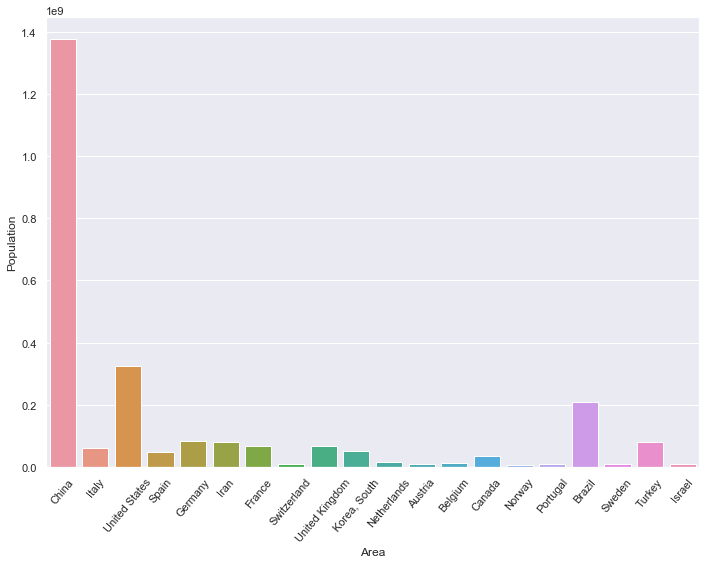

In [40]:
ax = sns.barplot(x='Area', y='Population', data=sum_over_region.head(20).reset_index())
ticks = ax.set_xticklabels(ax.get_xticklabels(),rotation=50)

#### Confirmed and deadly cases normalized by inhabitants

In [41]:
sum_over_region["Confirmed per 100,000 inhabitants"] = sum_over_region["Confirmed"]*100000/sum_over_region["Population"]
sum_over_region["Deaths per 100,000 inhabitants"] = sum_over_region["Deaths"]*100000/sum_over_region["Population"]

Order by confirmed cases

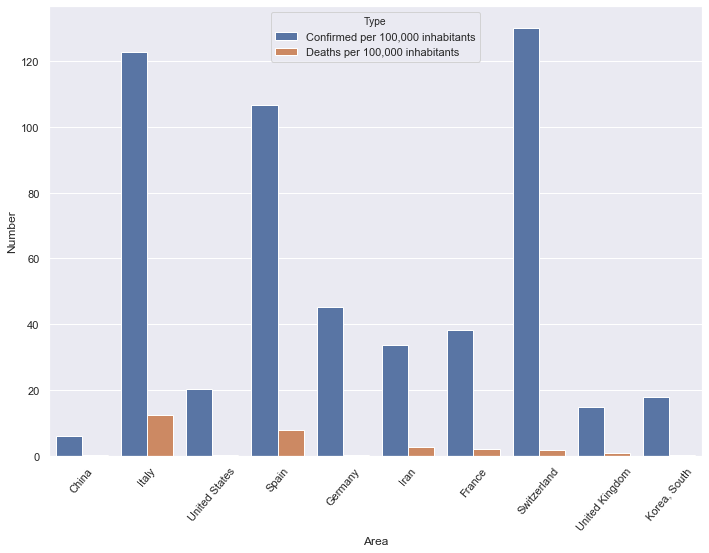

In [42]:
melted_summary = pd.melt(sum_over_region.drop(["Population", "Confirmed", "Deaths", "Recovered", "Active", "Deadly Case Rate", "Country Code"], axis=1).reset_index().head(10), id_vars="Area", var_name="Type", value_name="Number")
ax = sns.barplot(x='Area', y='Number', hue='Type', data=melted_summary)
ticks = ax.set_xticklabels(ax.get_xticklabels(),rotation=50)

#### Order by Confirmed cases per 100,000 inhabitants

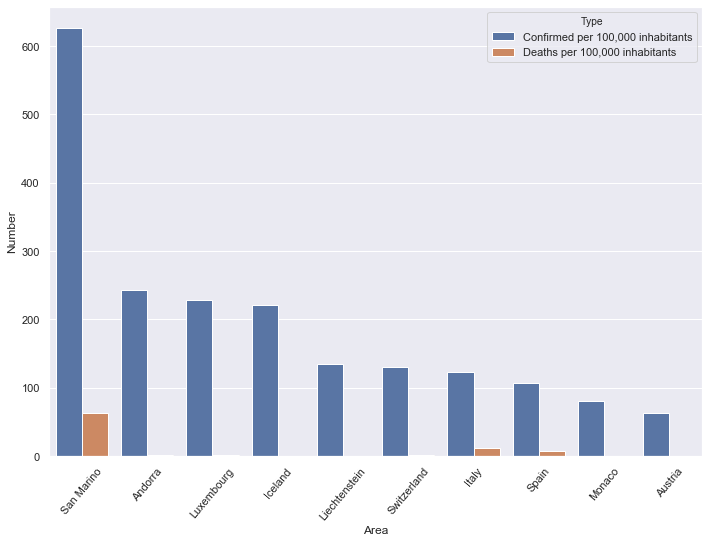

In [43]:
melted_summary = pd.melt(sum_over_region.sort_values(by="Confirmed per 100,000 inhabitants", ascending=False).reset_index().drop(["Population", "Confirmed", "Deaths", "Recovered", "Active", "Deadly Case Rate", "Country Code"], axis=1).head(10), id_vars="Area", var_name="Type", value_name="Number")
ax = sns.barplot(x='Area', y='Number', hue='Type', data=melted_summary.reset_index())
ticks = ax.set_xticklabels(ax.get_xticklabels(),rotation=50)

#### Order by Deadly cases per 100,000 inhabitants

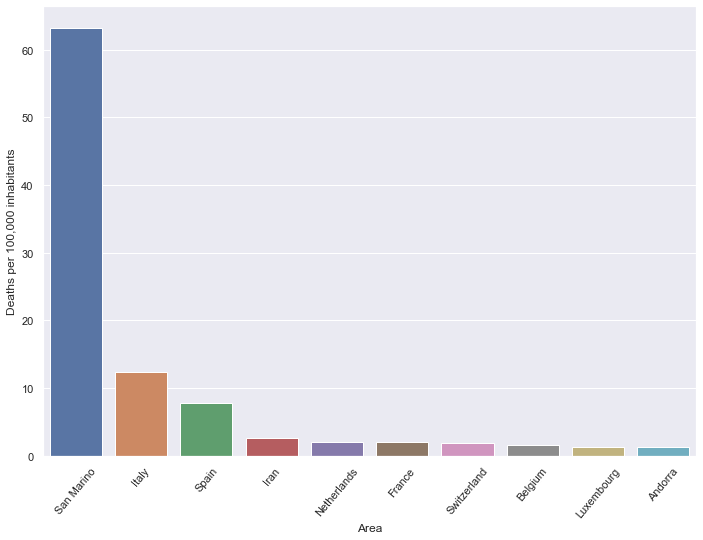

In [44]:
ax = sns.barplot(x='Area', y='Deaths per 100,000 inhabitants', data=sum_over_region.reset_index().sort_values(by="Deaths per 100,000 inhabitants", ascending=False).head(10))
ticks = ax.set_xticklabels(ax.get_xticklabels(),rotation=50)

### Analysis over time for specific countries

In [45]:
from datetime import datetime

In [46]:
all_reports = {datetime.strptime(rep.split("/")[-1].split(".csv")[0], '%m-%d-%Y'):pd.read_csv(rep) for rep in daily_reports}

In [47]:
report_time = all_reports[list(all_reports.keys())[-1]]
report_time = report_time.rename(columns={"Confirmed":"Confirmed_{}".format(list(all_reports.keys())[-1]), "Deaths":"Deaths_{}".format(list(all_reports.keys())[-1]), "Recovered":"Recovered_{}".format(list(all_reports.keys())[-1]), "Country_Region":"Area", 'Country/Region':"Area"})
report_time = report_time.groupby("Area").sum().reset_index()

deaths = confirmed = recovered = report_time[["Area"]].set_index("Area")

report_time = report_time.set_index("Area")

for date,rep in all_reports.items():
    rep=rep.rename(columns={"Country_Region":"Area", "Country/Region":"Area"})
    rep=rep[["Area", "Confirmed", "Deaths", "Recovered"]]
    rep = rep.groupby("Area").sum().reset_index()
    
    report_time = report_time.join(rep.set_index("Area"), rsuffix="_{}".format(date), how="outer")
    deaths = deaths.join(rep.set_index("Area")["Deaths"], how="outer")
    confirmed = confirmed.join(rep.set_index("Area")["Confirmed"], how="outer")
    recovered = recovered.join(rep.set_index("Area")["Recovered"], how="outer")
    
    deaths = deaths.rename(columns={"Deaths":date})
    recovered = recovered.rename(columns={"Recovered":date})
    confirmed = confirmed.rename(columns={"Confirmed":date})


In [48]:
confirmed

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2020-03-16,2020-03-17,2020-03-18,2020-03-19,2020-03-20,2020-03-21,2020-03-22,2020-03-23,2020-03-24,2020-03-25
Area,,,,,,,,,,,,,,,,,,,,,
Azerbaijan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21.0,22.0,22.0,22.0,24.0,24.0,40.0,40.0,74.0,84.0
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,51.0,55.0,59.0,64.0,70.0,76.0,89.0,104.0,123.0,146.0
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,54.0,60.0,74.0,87.0,90.0,139.0,201.0,230.0,264.0,302.0
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,39.0,39.0,53.0,75.0,88.0,113.0,133.0,164.0,188.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vietnam,NaN,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,61.0,66.0,75.0,85.0,91.0,94.0,113.0,123.0,134.0,141.0
Zambia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.0,2.0,2.0,2.0,3.0,3.0,3.0,12.0


In [49]:
def get_top_n (data, n=10, country_list=[], total=True, sort_by_index=-1, every_x_days=1):
    #select countries
    if country_list:
        top_countries = data.T[country_list].reset_index()
    else: 
        top_countries = data.sort_values(by=data.columns[sort_by_index],ascending=False).head(n).T.reset_index()
      
    # determine total if necessary
    if total:
        top_countries["Total"] = list(data.sum())
    
    #smooth graph by only keeping every xth day
    keep_list = [x%every_x_days==0 for x in range(len(top_countries))]
    dates = top_countries.reset_index()["index"][keep_list]
    top_countries = top_countries.groupby(top_countries.index // every_x_days).mean()
    top_countries["Date"] = list(dates)

    return top_countries

def draw_top_n (data, n=10, country_list=[], total=True, sort_by_index=-1, log_scale=False, every_x_days=1):
    top_countries = get_top_n (data, n, country_list, total, sort_by_index, every_x_days)
    
    # melt data frame
    melted_summary = pd.melt(top_countries, id_vars="Date", var_name="Country", value_name="Number")
    
    f, ax = plt.subplots()
    if log_scale:
        ax.set(yscale="log")
    plot = sns.lineplot(x="Date", y="Number",
                 hue="Country",
                 data=melted_summary.reset_index(), ax=ax)

#### Confirmed Cases over time for different countries

Looking at the countries with the highest number of confirmed cases

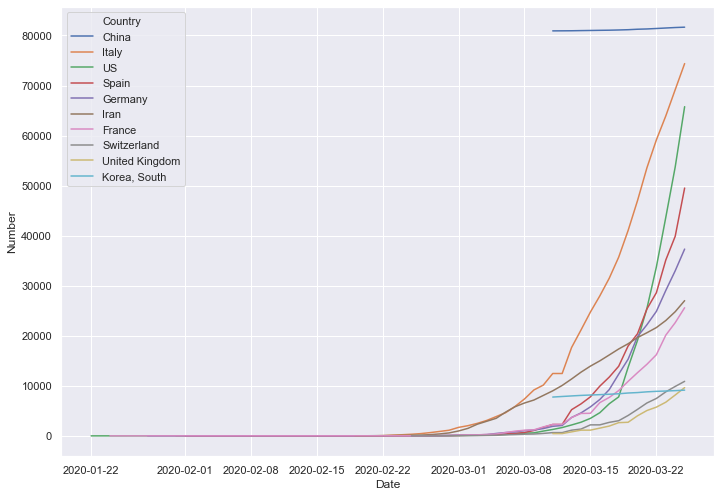

In [50]:
draw_top_n(confirmed, n=10, total=False)

China and South Korea don't have the correct data for the past. This is because the data source used different names over time.

In [51]:
confirmed = confirmed.reset_index().replace({'Area': {'Mainland China':'China', "Korea, South": "South Korea", "Republic of Korea": "South Korea", "Iran (Islamic Republic of)": "Iran"}}).groupby('Area', sort=False).sum()
deaths = deaths.reset_index().replace({'Area': {'Mainland China':'China', "Korea, South": "South Korea", "Republic of Korea": "South Korea", "Iran (Islamic Republic of)": "Iran"}}).groupby('Area', sort=False).sum()
recovered = recovered.reset_index().replace({'Area': {'Mainland China':'China', "Korea, South": "South Korea", "Republic of Korea": "South Korea", "Iran (Islamic Republic of)": "Iran"}}).groupby('Area', sort=False).sum()

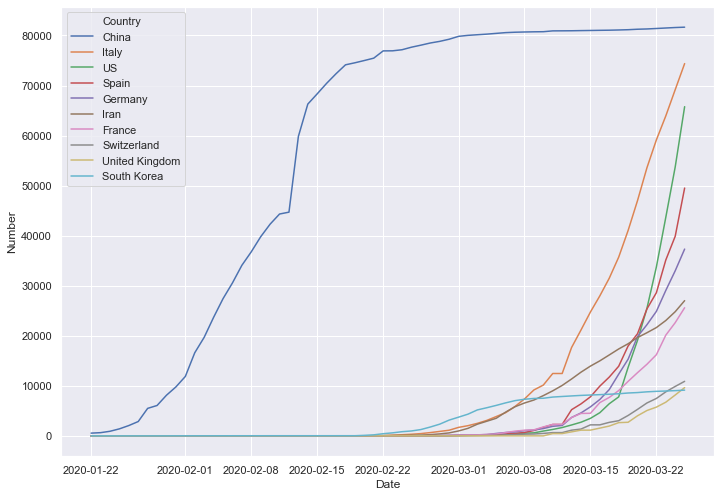

In [57]:
draw_top_n(confirmed, total=False, n=10)

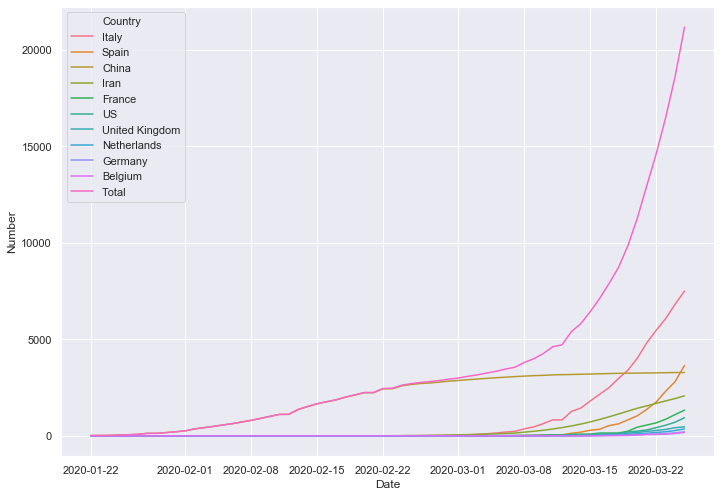

In [55]:
draw_top_n(deaths, total=True)

Having a look at the growth rate

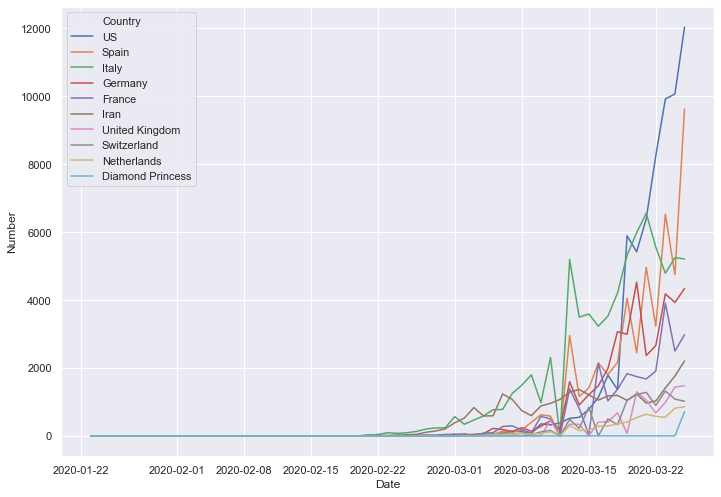

In [58]:
draw_top_n(confirmed.diff(axis=1), total=False)

In [61]:
countries_to_look_at = ["Italy", "China", "Spain", "South Korea"]

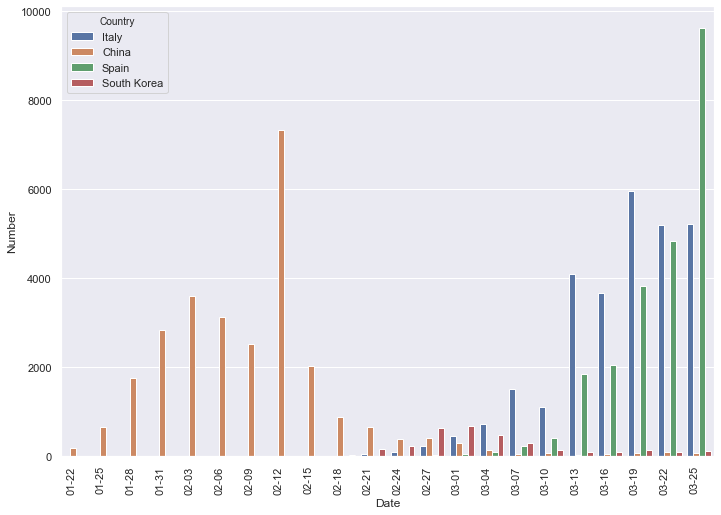

In [62]:
d = get_top_n(confirmed.diff(axis=1), country_list=countries_to_look_at, total=False, every_x_days=3)
melted_summary = pd.melt(d, id_vars="Date", var_name="Country", value_name="Number")
f, ax = plt.subplots()
# ax.set(yscale="log")
plot = sns.barplot(x='Date', y='Number', hue='Country', data=melted_summary, ax=ax)
x_dates = melted_summary['Date'].dt.strftime('%m-%d')
ticks = ax.set_xticklabels(labels=x_dates, rotation=90, ha='right')